# Практическая работа №3: Статистический анализ социальных сетей.
Выполнил студент гр. 0383 Козлов Тимофей. Вариант №56

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения

**Диада** $-$ элемент сети, представляющий собой пару акторов и (возможную) связь между ними: $D_{ij}=(X_{ij}, X_{ji}), i\neq j$.

**Взаимная диада** $D_{ij}=(1,1)$

**Асимметричная диада** $D_{ij}=(1,0), D_{ij}=(0,1)$

**Нулевая диада** $D_{ij}=(0,0)$

**Цензус диад** $-$ тройка чисел $M, A, N$, где:

$M = \sum_{i<j} X_{ij} X_{ji}$

$A = X_{++} - 2M$

$N = C^2_g - A - M$

**Модель Эрдёша — Реньи** — это одна из двух тесно связанных моделей генерации. В ней граф строится путём случайного добавления рёбер. Каждое ребро включается в граф с вероятностью p независимо от остальных рёбер. Эквивалентно, все графы с n узлами и M рёбрами имеют одинаковую вероятность:
$p^M (1-p)^{C^2_n - M}$.

**Индекс взаимности Каца-Пауэлла** (Reciprocity of Katz and Powell) $-$ характеристика измерения тенденции акторов в группе. Данный индекс оценивает тенденцию акторов в группе к взаимному выбору друг друга. 

$-\infty < \rho_{кр} \leqslant 1$.

Если $\rho_{кр} = 0$, то акторы не имеют склонности взаимно выбирать друг друга.

Если $\rho_{кр} = 1$, то акторы показывают максимальную тенденцию к взаимному выбору друг друга.

Если $\rho_{кр} < 0$, то акторы склонны образовывать односторонние связи или не образовывать их вообще.

Индекс взаимности основан на ожидании количества взаимных диад, предполагая, что выбор делается акторами случайным образом. Выбор может быть фиксированным или свободным.

Для фиксированного выбора из $d$ акторов:

По методу моментов оценка $\hat{\rho}_{кр} = \displaystyle{\frac{2(g-1)M - gd^2}{gd(g - d - 1)}}$.

Вероятность того, что связь будет взаимной для двух акторов:

$\displaystyle{P(i \rightarrow j \wedge j \rightarrow i) = \frac{d}{g - 1}\left( \frac{d}{g - 1} + \rho_{кр} \frac{g - 1 - d}{g - 1} \right)}.$

Для свободного выбора:

По методу моментов оценка $\hat{\rho}_{кр} = \displaystyle{\frac{2(g-1)^2M - L^2 + L_2}{L(g - 1)^2 - L^2 - L_2}}$.

Вероятность того, что связь будет взаимной для двух акторов (для каждого из акторов):

$P = \displaystyle{\frac{x_{i+}x_{j+}}{(g - 1)^2}}.$

**Индекс взаимности Бандиопадхьяйя** $-$ индекс, основанный на максимальной и минимальной значениях количества диад в сети. 

$\rho_B = \displaystyle{\frac{M - M_{\min}}{M_{\max} - M_{\min}}},$

где $M_{\min} = \max f(t), 0 \leqslant t \leqslant g$, 

$M_{\max} = \lfloor 0.5 \sum^g_{i = 1} x_{i+} - \max g(t)\rfloor, 0 \leqslant t \leqslant g,$

$f(t) = \sum^t_{i=1} x_{i+} - t(g - 1) - C^2_g,$

$g(t) = \sum^t_{i=1} x_{i+} - t(t - 1) - \sum^g_{i=t+1} \min (t, x_{i+}).$

**Вычисление доверительного интервала для оценки P.**

Оценка параметра $P$:

$\hat{P} = \displaystyle{\frac{\sum_{i = 1}^g \sum_{j = 1}^g x_{ij}}{g(g-1)} = \frac{l}{g(g - 1)}}.$

Доверительный интервал: $\hat{P}_{lower} \leqslant P \leqslant \hat{P}_{upper}$.

$\hat{P}_{lower} = \displaystyle{\hat{P} - z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}}$

$\hat{P}_{lower} = \displaystyle{\hat{P} + z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}}$

$z_{\alpha/2}$ вычисляется из $\Phi(z_{\alpha/2}) = 0.5 - 0.5 \alpha$, где $\alpha - $ некоторый уровень значимости, $(1 - \alpha) - $ доверительная надёжность. 

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы
#### 0. Загрузка билиотек

In [75]:
library(igraph)
library(statnet)

#### 1. С помощью библиотеки igraph смоделировать случайный орграф G𝑑 на основе модели Эрдеша—Реньи: G𝑑 = G (𝑔, 𝑝), где 𝑔 – количество акторов, 𝑝 – вероятность появления дуги между акторами. В R для модели случайного графа Эрдеша—Реньи существует функция erdos.renyi.game(). Ознакомьтесь с данной моделью и опишите её.

Вариант 56: g = 67 p = 0.56

In [76]:
g <- 67
p <- 0.56
graph <- erdos.renyi.game(g, p, "gnp", directed = T)
graph

IGRAPH df0070b D--- 67 2461 -- Erdos-Renyi (gnp) graph
+ attr: name (g/c), type (g/c), loops (g/l), p (g/n)
+ edges from df0070b:
 [1]  4-> 1  5-> 1  7-> 1  8-> 1 11-> 1 12-> 1 13-> 1 16-> 1 18-> 1 19-> 1
[11] 22-> 1 26-> 1 28-> 1 31-> 1 32-> 1 33-> 1 34-> 1 35-> 1 38-> 1 39-> 1
[21] 40-> 1 41-> 1 42-> 1 44-> 1 45-> 1 46-> 1 47-> 1 50-> 1 52-> 1 55-> 1
[31] 57-> 1 58-> 1 61-> 1 62-> 1 64-> 1 65-> 1  1-> 2  2->67  3-> 2  5-> 2
[41]  7-> 2 10-> 2 13-> 2 14-> 2 15-> 2 17-> 2 21-> 2 24-> 2 25-> 2 26-> 2
[51] 27-> 2 29-> 2 31-> 2 35-> 2 37-> 2 38-> 2 39-> 2 40-> 2 41-> 2 42-> 2
[61] 44-> 2 45-> 2 46-> 2 47-> 2 48-> 2 51-> 2 52-> 2 53-> 2 54-> 2 55-> 2
[71] 56-> 2 60-> 2 65-> 2 66-> 2 67-> 2  2-> 3  3->67  5-> 3  6-> 3 10-> 3
+ ... omitted several edges

В модели Эрдеша—Реньи G𝑑 = G (𝑔, 𝑝) граф строится путём случайного добавления рёбер. Каждое ребро включается в граф с вероятностью p независимо от остальных рёбер. Эквивалентно, все графы с n узлами и M рёбрами имеют одинаковую вероятность:
$p^M (1-p)^{C^2_n - M}$.

#### 2. Отобразить полученный орграф

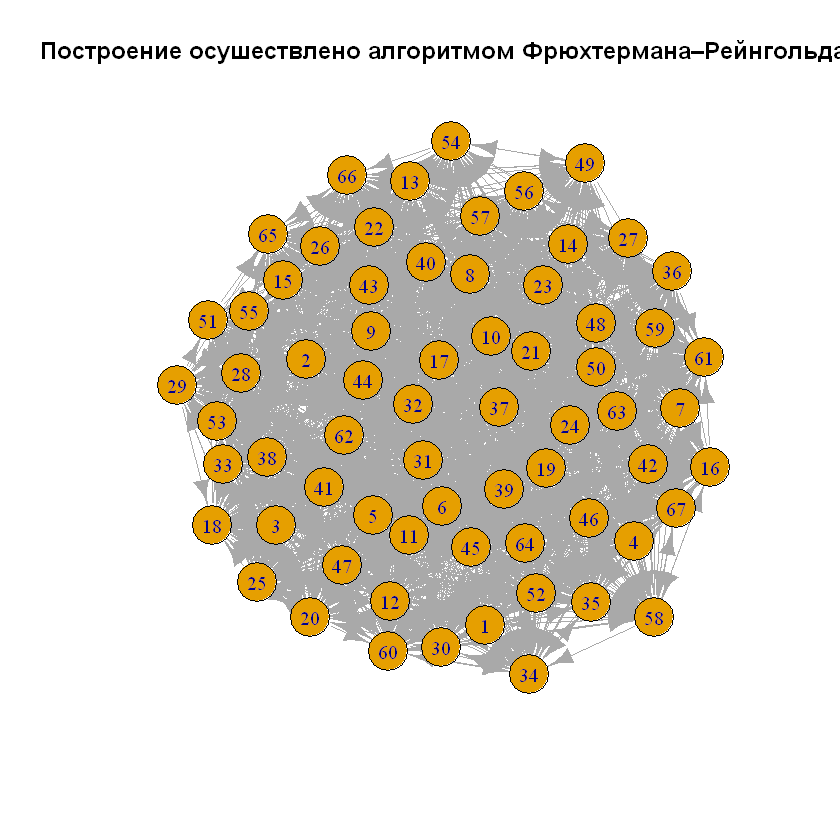

In [77]:
plot(graph, layout=layout.fruchterman.reingold(graph), main = "Построение осушествлено алгоритмом Фрюхтермана–Рейнгольда")

#### 3. Вычислить «пятичисловую сводку» для графа G𝑑.

In [78]:
cat("Размер: ", gorder(graph), "\n")
cat("Плотность",edge_density(graph),"\n")
cat("Компоненты:", igraph::components(graph)$no, "\n")
cat("Диаметр:", diameter(graph), "\n")
cat("Кластеризация: ", transitivity(graph), "\n")

Размер:  67 
Плотность 0.5565355 
Компоненты: 1 
Диаметр: 2 
Кластеризация:  0.799811 


#### 4. Вычислить цензус диад. Сделать выводы.

In [79]:
census <- dyad_census(graph)
census

$mut
[1] 691

$asym
[1] 1079

$null
[1] 441

Вывод:
691 - число взаимных диад
1079 - число ассиметричных диад
441 - число пар акторов, между которыми нет связи

#### 5. Вычислить оценку индекса взаимности Каца—Пауэла при фиксированом выборе акторов 𝑑 и при свободном выборе. Сделать выводы.
Фиксированный выбор акторов (d = 56):

In [80]:
d <- 56
mut <- census$mut
fix <- (2 * (g - 1) * mut - g * d^2) / (g * d * (g - 1 - d))
fix

[1] -3.168977

Свободный выбор акторов:

In [81]:
matrix <- as.matrix(as_adjacency_matrix(graph))
L <- sum(rowSums(matrix))
L2 <- sum(rowSums(matrix)^2)

free <- (2 * (g - 1)^2 * mut - L^2 + L2)/(L * (g - 1)^2 - L^2 + L2)
free

[1] 0.01159266

Вывод: 
При фиксированном выборе акторов акторы склонны образовывать односторонние связи.
При свободном выборе акторы показывают тенденцию к взаимному выбору друг друга.

#### 6. Вычислить вероятность того, что связь будет взаимной для каждого случая.
Фиксированный выбор акторов (d = 56):

In [82]:
fixP <- (d / (g - 1)) * ((d / (g - 1)) + fix * (g - 1 - d) / (g - 1))
fixP

[1] 0.3125283

Свободный выбор акторов:

In [83]:
p <- (rowSums(matrix) * colSums(matrix)) / (g - 1)^2
freeP <- sum(p) / g
freeP

[1] 0.3093554

#### 7. Вычислить индекс взаимности Бандиопадхьяйя. Сделать выводы

In [88]:
f_t <- function(matrix_row_sum, t) {
  x_sum <- sum(matrix_row_sum[1:t])
  C <- factorial(t) / (factorial(2) * factorial(t - 2))
  res <- x_sum - t * (g - 1) - C 
  
  return(res)
}

f_res <- rep(2, g)
for (t in 2:g) {
  f_res[t] <- f_t(rowSums(matrix), t)
}

g_t <- function(matrix_row_sum, t) {
  x_sum <- sum(matrix_row_sum[1:t])
  min_sum <- 0   
  for (i in (t + 1):g) {
    min_sum <- min_sum + min(c(t, matrix_row_sum[i]))
  }
  
  return(x_sum - t * (t - 1) - min_sum)
}

g_res <- rep(2, g - 1)
for (t in 2:(g - 1)) {
  g_res[t] <- g_t(rowSums(matrix), t)
}


M_min <- max(f_res)

res <- (mut - M_min) / (floor(0.5 * sum(rowSums(matrix)[1:g]) - max(g_res)) - M_min)
res

[1] 0.5619902

Вывод: количество взаимных диад примерно равно 56% от их максимально количества

#### 8. Проверить нулевую гипотезу о том, что число дуг 𝐿 в орграфе G𝑑 имеет биномиальное распределение 𝐿 ∼ Bin(𝑔(𝑔 − 1), 1/2) при уровне значимости 𝛼. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается.
Вариант 56: a = 0.03, P0 = 0.74

In [85]:
l <- sum(matrix)
binom.test(l, g * (g - 1), p = 0.5)


	Exact binomial test

data:  l and g * (g - 1)
number of successes = 2461, number of trials = 4422, p-value =
5.831e-14
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.5417466 0.5712496
sample estimates:
probability of success 
             0.5565355 


Нулевая гипотеза не выполняется, т.к. p-value много меньше a + вероятность построения ребра между любыми двумя акторами не равняется 0.5.
Максимальный уровень значимости, при котором нулевая гипотеза не отвергается - p-value = 5.831e-14)

#### 9. Проверить нулевую гипотезу о том, что число дуг 𝐿 в орграфе G𝑑 имеет биномиальное распределение 𝐿 ∼ Bin(𝑔(𝑔−1), 𝑃0) при уровне значимости 𝛼. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается.

In [86]:
binom.test(l, g * (g - 1), p = 0.74)


	Exact binomial test

data:  l and g * (g - 1)
number of successes = 2461, number of trials = 4422, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.74
95 percent confidence interval:
 0.5417466 0.5712496
sample estimates:
probability of success 
             0.5565355 


Нулевая гипотеза не выполняется, т.к. p-value много меньше a + вероятность построения ребра между любыми двумя акторами не равняется 0.74.
Максимальный уровень значимости, при котором нулевая гипотеза не отвергается - p-value (p-value < 2.2e-16)

#### 10. Построить доверительный интервал для оценки параметра 𝑝 с доверительной надёжностью (1 − 𝛼). Сделать выводы.

In [87]:
alpha <- 0.03

cat("Оценка параметра p:")
grade <- (sum(matrix)) / (g * (g - 1))
grade

cat("Значение функции Лапласа: ")
lap <- 0.5 - (alpha / 2)
lap

x <- 2.16

cat("Доверительный интервал: ")
lower <- grade - x * sqrt((grade * (1 - grade))/(g * (g - 1)))
upper <- grade + x * sqrt((grade * (1 - grade))/(g * (g - 1)))                      
cat(paste("(", lower, ", ", upper, ")"))

Оценка параметра p:

[1] 0.5565355

Значение функции Лапласа: 

[1] 0.485

Доверительный интервал: ( 0.540398599103125 ,  0.572672409490272 )

Вывод: доверительный интервал рассчитан верно, т.к. p = 0.56 - входит в этот интервал.

## Выводы

В ходе выполнения практической работы с помощью библиотеки igraph на основе модели Эрдёша — Реньи был смоделирован ориентированный граф. Вычислена пятичисловая сводка сети для данного графа. Изучено понятие диады, вычисленна оценка индекса взаимности Каца—Пауэла для фиксированного выбора акторови и свободного. Проверена нулевая гипотеза, вычислен доверительный интервал (в который попало значение p)